In [1]:
source("../utils.R")
options(repr.plot.width = 10, repr.plot.height = 10)

Warning message in unit(c(t, r, b, l), unit):
“NAs introduced by coercion”


# Exercice 1

## (a)

In [2]:
cutVector <- function(vec, m) {
  n <- length(vec) / m
  
    lapply(0:(m - 1),
          \(x) vec[seq(n * x + 1, n * (x + 1))])
}


In [3]:
cutVector_loop <- function(vec, m) {
    n <- length(vec) / m

    ret <- vector(mode = "list", length = m)
    for (k in seq_along(ret) - 1L)
        ret[[k + 1L]] <- vec[seq(n * k + 1L, n * (k + 1L))]

    ret
}

In [4]:
dist0 <- function(m, n = 1e4){
    dat <- sample(0:9, size = n * m, replace = TRUE)
    dat_chopped <- cutVector(dat, m)

    sapply(dat_chopped, \(v) mean(v == 0))
}

In [5]:
dist0_loop<- function(m, n = 1e4){
    dat <- sample(0:9, size = n * m, replace = TRUE)
    dat_chopped <- cutVector_loop(dat, m)

    ret <- vector(mode = "numeric", length = m)
    for (k in seq_along(dat_chopped))
        ret[[k]] <- mean(dat_chopped[[k]] == 0)

    ret
}

## (b)

In [6]:
bench <- microbenchmark::microbenchmark(dist0(5L, 1e1L),
                                        dist0_loop(5L, 1e1L),
                                        dist0(5L, 1e5L),
                                        dist0_loop(5L, 1e5L))

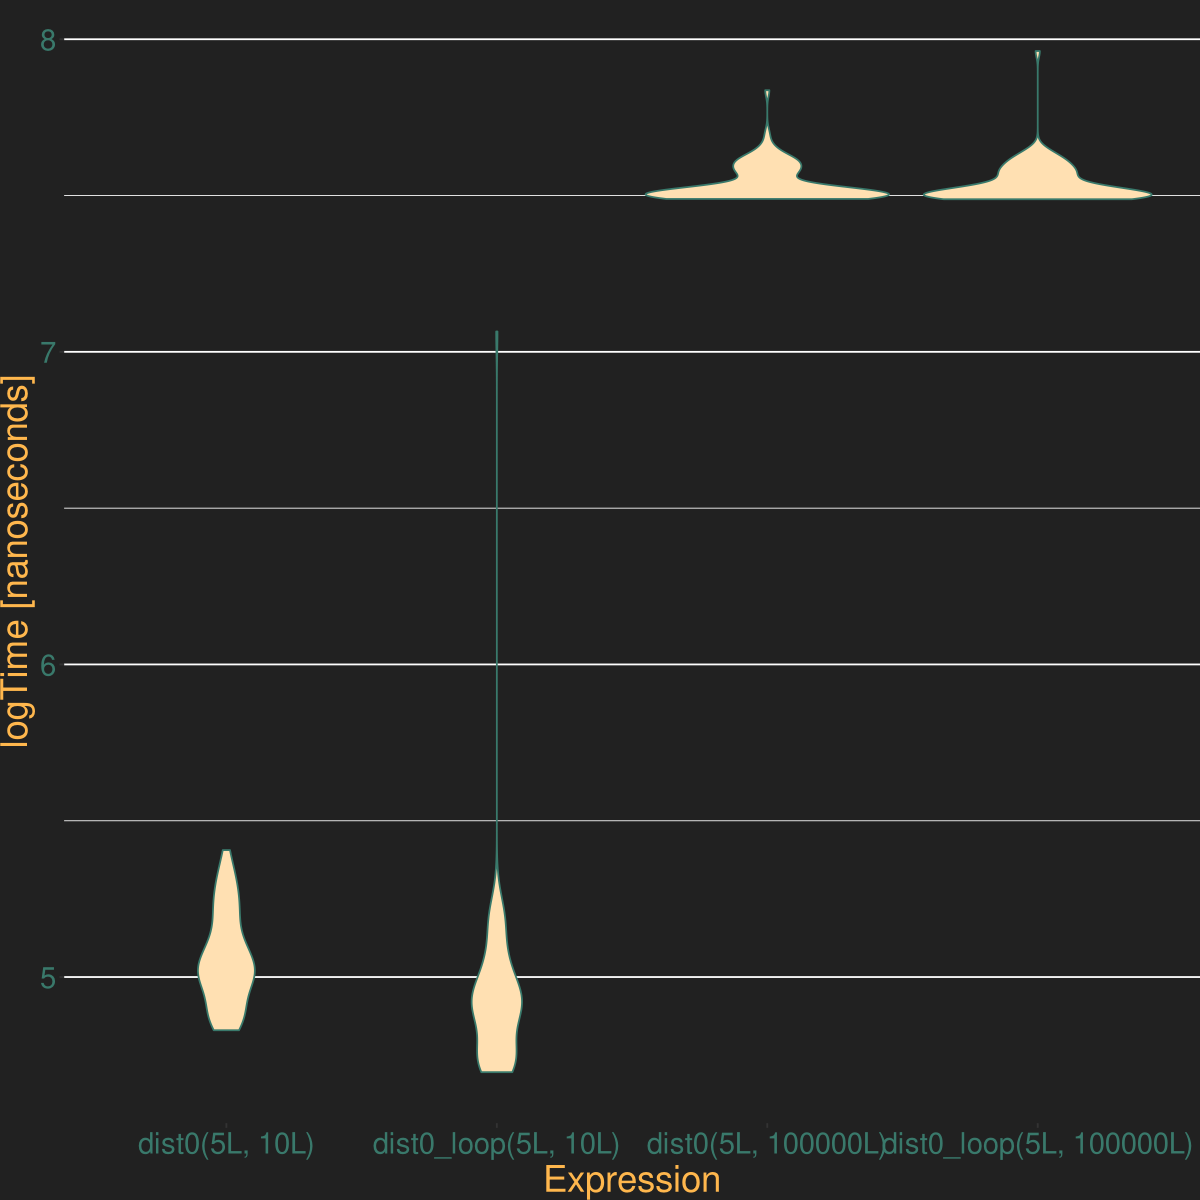

In [7]:
autoplot(bench)

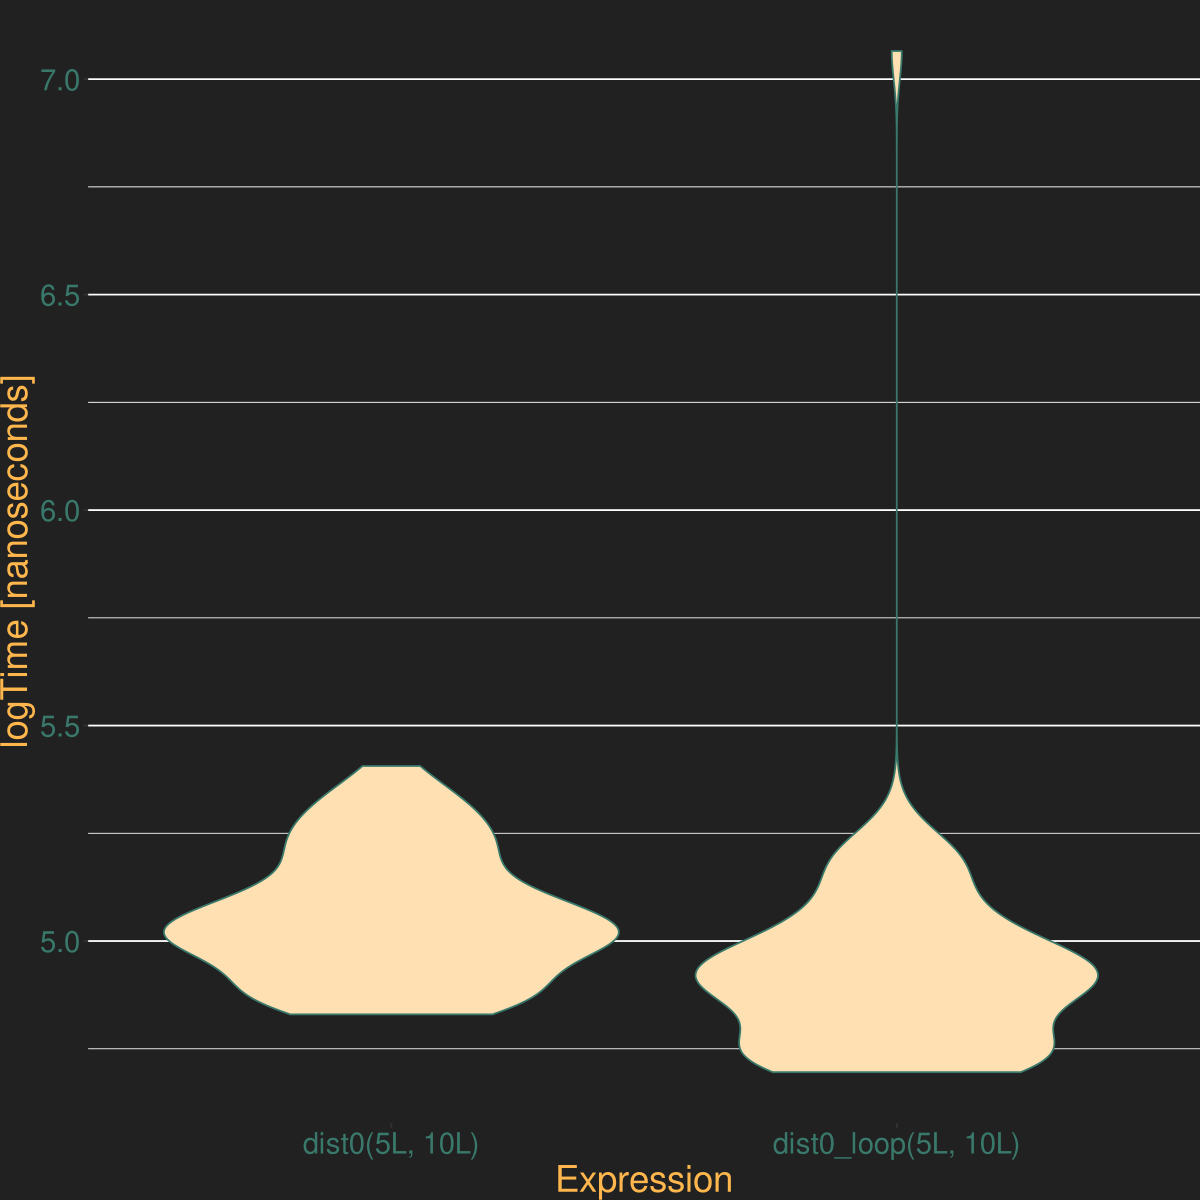

In [8]:
autoplot(subset(bench, expr %in% c("dist0_loop(5L, 10L)", "dist0(5L, 10L)")))

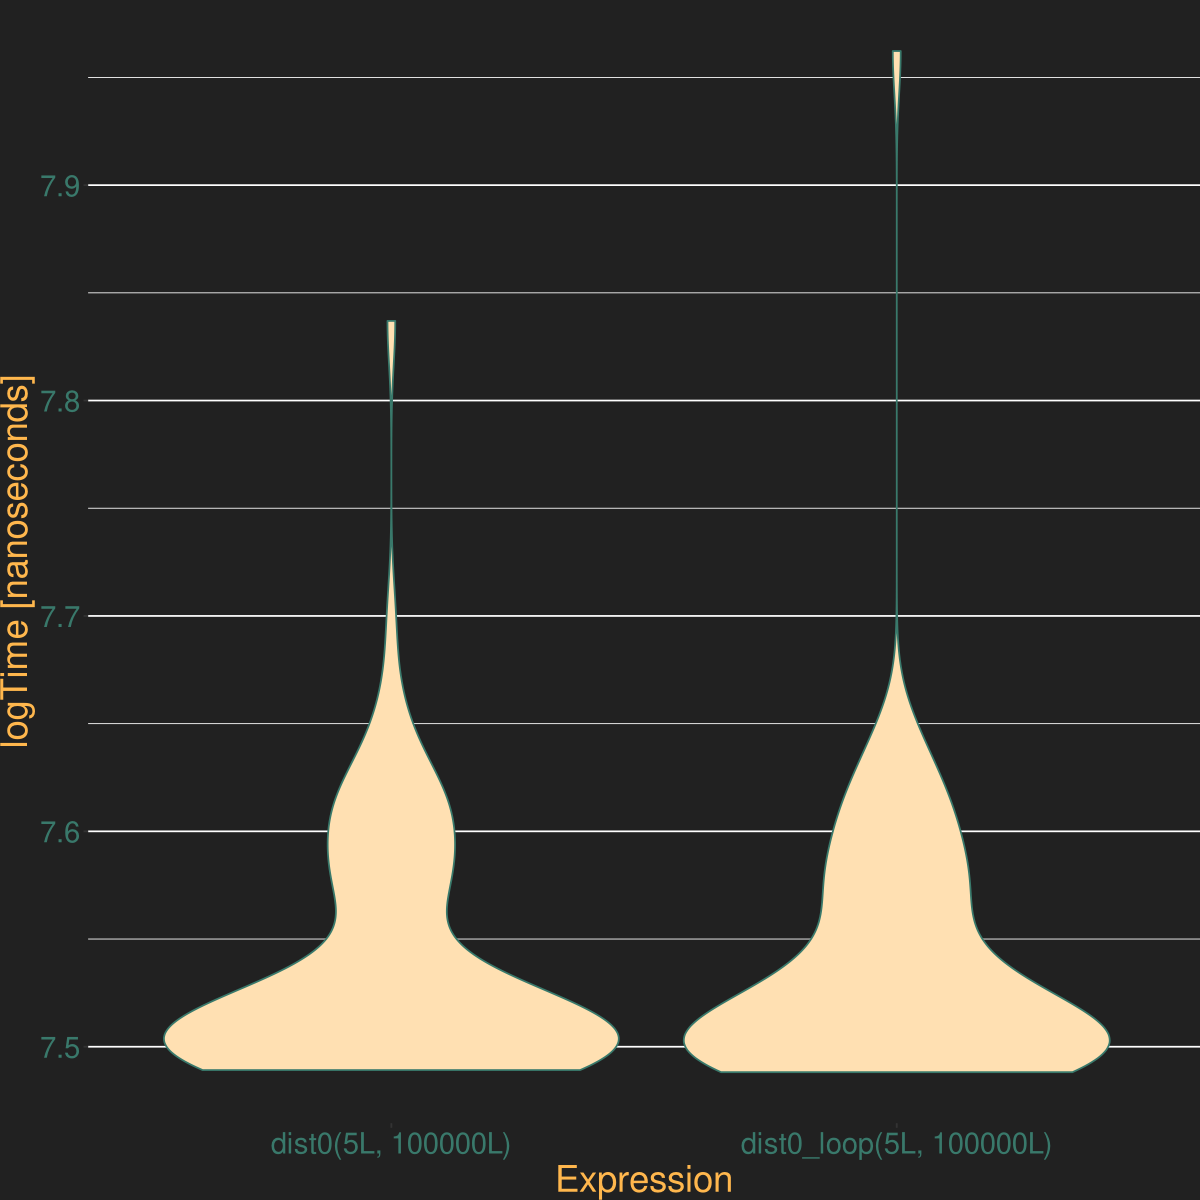

In [9]:
autoplot(subset(bench, expr %in% c("dist0_loop(5L, 100000L)", "dist0(5L, 100000L)")))

## (c)

Rstudio!

# Exercice 2

## (a)

In [10]:
cesar <- function(str, key, decode = FALSE) {
    ## On suppose 1 <= `key` <= 100 et `str` alphanumérique.
    if (decode)
        key  <- -key
    
    raw_str <- as.raw(charToRaw(str))
    ascii_str <- strtoi(raw_str, 16L)
    
    ascii_str_crypt <- ascii_str + key
    
    rawToChar(as.raw(ascii_str_crypt))
}

In [11]:
cesar("Allo les amis!!", 10)
cesar(cesar("Allo les amis!!", 10), 10, decode = TRUE)

[1] "Kvvy*vo}*kws}++"

[1] "Allo les amis!!"

## (b)

In [12]:
rpoiplus <- function(n, lambda) {
    ## n : Nombre d'observations à générer.
    ## lambda: Paramètre de la distribution.
    vec <- runif(n) #Vecteur contenant l'échantillon.

    ## efl contient le mode de la distribution (partie entière
    ## de l'espérance).
    ex <- (lambda * exp(lambda)) / (exp(lambda) - 1)
    efl <- floor(ex)

    ## On génère récursivement la répartition jusqu'au mode.
    F <- vector("numeric", 1)
    F[1] <- lambda / (exp(lambda) - 1)
    F[2] <- F[1] + lambda^2 / ((exp(lambda) - 1) * 2)
    max_x_sim <- 2 # Plus grande valeur de x calculée.
    while(max_x_sim < efl){
        p <- F[max_x_sim] - F[max_x_sim - 1]
        F <- append(F, F[max_x_sim] + lambda * p / (max_x_sim + 1))
        max_x_sim <- max_x_sim + 1
    }

    for(i in 1:n){
        if(vec[i] < F[efl]){
            ## On teste à reculon à partir du mode.
            if (efl > 1.0)
                for(k in (efl - 1):1){
                    if(vec[i] > F[k]){
                        vec[i] <- k + 1
                        break
                    }
                }
            ## Si la valeur de vec[i] n'a pas changée, alors nécessairement
            ## F^-1(vec[i]) = 1.
            if(vec[i] < 1)
                vec[i] <- 1
        }
        else{
            k <- efl + 1
            while(vec[i] < 1){
                ## On s'assure qu'on a assez de valeurs de F.
                if(k > max_x_sim){
                    p <- F[max_x_sim] - F [max_x_sim - 1]
                    F <- append(F, F[max_x_sim] + lambda * p / (max_x_sim + 1))
                    max_x_sim <- max_x_sim + 1
                }
                if(vec[i] <= F[k])
                    vec[i] <- k
                k <- k + 1
            }
        }
    }
    return(vec)
}

In [13]:
rpoiplus(10L, 0.001)

[1] 1 1 1 1 1 1 1 1 1 1